# Data Cleansing

Get "bad signal" marks from an external "amend" file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import zoll
from utils import nirs
from utils import misc
from utils.autoscale import autoscale

In [2]:
# parameters
case_id = 1
step_id = 3

In [3]:
case_str = str(case_id).zfill(5)
output_file = f'output/{case_str}_{step_id}.csv'

In [4]:
input_file = 'output/' + case_str + '_2.csv'
amend_file = 'amend/' + case_str + '_a1.csv'

In [5]:
df = pd.read_csv(input_file,
                 sep = ',',
                 na_values = ['-'],
                 parse_dates = ['Time'],
                 index_col='Time')

In [6]:
amend_df = pd.read_csv(amend_file,
                 sep = ',',
                 na_values = ['-'],
                 parse_dates = ['Time'])

In [7]:
df['Bad_MAP_manual'] = amend_df['Bad_MAP_manual'].array.astype(int)

In [8]:
df = misc.TrimData(df)
misc.NormalizeTimeIndex(df)

In [9]:
nirs_man_ranges = misc.GetRanges(df, 'Bad_rSO2_manual')
nirs_auto_ranges = misc.GetRanges(df, 'Bad_rSO2_auto')
map_man_ranges = misc.GetRanges(df, 'Bad_MAP_manual')
map_auto_ranges = misc.GetRanges(df, 'Bad_MAP_auto')

In [10]:
mark_timestamp = df.loc[df['Mark'] == 1].index[0]

In [11]:
# save data to csv
df[['MAP', 'Bad_MAP_auto', 'Bad_MAP_manual', 'rSO2', 'Mark', 'Bad_rSO2_auto', 'Bad_rSO2_manual']].to_csv(output_file, na_rep='-', date_format='%H:%M:%S')

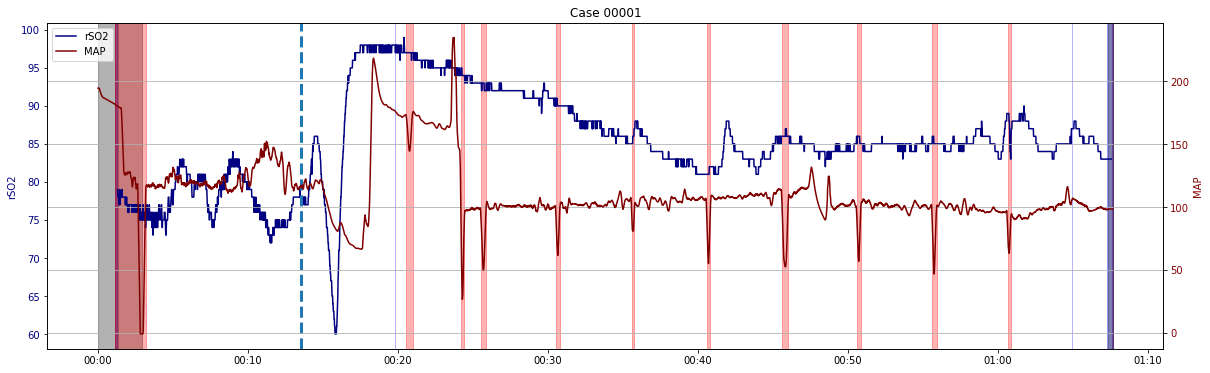

In [12]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.set_ylabel('rSO2', color='navy')
line1 = ax1.plot(df.index, df['rSO2'], color='navy', label='rSO2')
ax1.tick_params(axis='y', labelcolor='navy')
ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax2.set_ylabel('MAP', color='maroon')
line2 = ax2.plot(df.index, df['MAP'], color='maroon', label='MAP')
ax2.tick_params(axis='y', labelcolor='maroon')
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')
ax2.grid()
plt.title(f'Case {case_str}')
for r in nirs_auto_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='blue')
for r in nirs_man_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='purple')
for r in map_auto_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='black')
for r in map_man_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='red')
ax1.axvline(mark_timestamp, linestyle='--', linewidth=3)
plt.autoscale(enable=True, axis="x", tight=True)
plt.savefig(f'reports/images/{step_id}_{case_str}_01.png', bbox_inches='tight', pad_inches=0.1)
plt.show()